In [1]:
import os
os.environ['CASTLE_BACKEND'] = 'pytorch'

from tqdm import tqdm

from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC, RL, CORL, DirectLiNGAM, ICALiNGAM, Notears, GOLEM, NotearsNonlinear

[2022-02-21 21:10:06,017][__init__.py - line 31] - INFO - You are using ``pytorch`` as the backend.


In [2]:
# Check if GPU is available
import torch
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1650'

In [3]:
# Data simulation, simulate true causal dag and train_data.
weighted_random_dag = DAG.erdos_renyi(n_nodes=10, n_edges=10, 
                                      weight_range=(-5., 5.), seed=1)
dataset = IIDSimulation(W=weighted_random_dag, n=2000, method='linear', 
                        sem_type='gauss')

true_causal_matrix, X = dataset.B, dataset.X

[2022-02-21 21:10:07,338][simulator.py - line 270] - INFO - Finished synthetic dataset


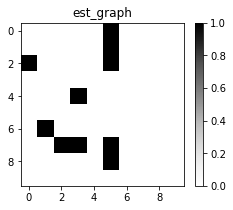

In [4]:
GraphDAG(true_causal_matrix)

In [4]:
rl = RL(
    device_type='gpu'
)

rl.learn(X)

[2022-02-21 21:10:50,375][rl.py - line 231] - INFO - GPU is available.
[2022-02-21 21:10:50,397][rl.py - line 273] - INFO - Python version is 3.8.12
[2022-02-21 21:10:50,452][rl.py - line 298] - INFO - Original sl: 1.5460639482703924, su: 7.8187149405738205, strue: -8.453936051729608
[2022-02-21 21:10:50,452][rl.py - line 299] - INFO - Transfomed sl: 1.5460639482703924, su: 7.8187149405738205, lambda2: 0.001, true: -7.971111426628108
[2022-02-21 21:10:53,956][rl.py - line 343] - INFO - Finished creating training dataset and reward class
[2022-02-21 21:10:53,956][rl.py - line 359] - INFO - Starting training.
  0%|                                                                                        | 0/20000 [00:00<?, ?it/s][2022-02-21 21:10:53,988][rl.py - line 371] - INFO - Shape of actor.input: torch.Size([64, 10, 64])
C:\Users\aleks\anaconda3\envs\econml-dowhy-py38\lib\site-packages\castle\algorithms\gradient\rl\torch\models\encoder\encoder.py:175: UserWarning: Implicit dimension c

RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 4.00 GiB total capacity; 535.21 MiB already allocated; 1.59 GiB free; 550.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [6]:
# Structure learning
methods = {
    'pc': PC(),
    
    'direct_lingam': DirectLiNGAM(),
    
    'ica_lingam': ICALiNGAM(),
    
    'notears': Notears(),
    
    'golem': GOLEM(device_type='gpu'),
    
    'notears_non_lin': NotearsNonlinear(device_type='gpu'),
    
    'corl': CORL(
        encoder_name='transformer',
        decoder_name='lstm',
        reward_mode='episodic',
        reward_regression_type='LR',
        batch_size=64,
        input_dim=64,
        embed_dim=64,
        iteration=2000,
        device_type='gpu')
}

for method in methods:
    print(f'\nLearning {method}...\n')
    methods[method].learn(X)

[2022-01-08 18:48:42,629][nonlinear.py - line 129] - INFO - GPU is available.
[2022-01-08 18:48:42,629][corl.py - line 173] - INFO - GPU is available.



Learning pc...


Learning direct_lingam...



C:\Users\aleks\anaconda3\envs\econml-dowhy-py38\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\aleks\anaconda3\envs\econml-dowhy-py38\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data,


Learning ica_lingam...



C:\Users\aleks\anaconda3\envs\econml-dowhy-py38\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\aleks\anaconda3\envs\econml-dowhy-py38\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Us


Learning notears...



[2022-01-08 18:48:44,488][linear.py - line 203] - INFO - [iter 0] h=5.138e-01, loss=1243.354, rho=1.0e+00
[2022-01-08 18:48:45,926][linear.py - line 203] - INFO - [iter 1] h=3.726e-01, loss=6.841, rho=1.0e+00
[2022-01-08 18:48:46,098][linear.py - line 203] - INFO - [iter 1] h=1.862e-01, loss=8.029, rho=1.0e+01
[2022-01-08 18:48:46,562][linear.py - line 203] - INFO - [iter 1] h=5.076e-02, loss=19.907, rho=1.0e+02
[2022-01-08 18:48:47,582][linear.py - line 203] - INFO - [iter 2] h=3.482e-02, loss=7.134, rho=1.0e+02
[2022-01-08 18:48:48,815][linear.py - line 203] - INFO - [iter 2] h=1.295e-02, loss=8.294, rho=1.0e+03
[2022-01-08 18:48:50,150][linear.py - line 203] - INFO - [iter 2] h=4.137e-03, loss=19.889, rho=1.0e+04
[2022-01-08 18:48:50,802][linear.py - line 203] - INFO - [iter 3] h=2.521e-03, loss=7.434, rho=1.0e+04
[2022-01-08 18:48:50,934][linear.py - line 203] - INFO - [iter 3] h=1.076e-03, loss=8.204, rho=1.0e+05
[2022-01-08 18:48:53,135][linear.py - line 203] - INFO - [iter 3] h=


Learning golem...



[2022-01-08 18:49:08,461][golem.py - line 217] - INFO - [Iter 0] score=77.098, likelihood=77.098, h=0.0e+00
[2022-01-08 18:50:12,460][golem.py - line 217] - INFO - [Iter 5000] score=50.410, likelihood=49.801, h=1.1e-03
[2022-01-08 18:51:16,453][golem.py - line 217] - INFO - [Iter 10000] score=50.112, likelihood=49.573, h=1.1e-04
[2022-01-08 18:52:23,330][golem.py - line 217] - INFO - [Iter 15000] score=50.112, likelihood=49.573, h=1.0e-04
[2022-01-08 18:53:30,027][golem.py - line 217] - INFO - [Iter 20000] score=50.112, likelihood=49.573, h=1.1e-04
[2022-01-08 18:54:35,750][golem.py - line 217] - INFO - [Iter 25000] score=50.112, likelihood=49.573, h=1.1e-04
[2022-01-08 18:55:20,716][golem.py - line 217] - INFO - [Iter 30000] score=50.112, likelihood=49.573, h=1.1e-04
[2022-01-08 18:56:06,641][golem.py - line 217] - INFO - [Iter 35000] score=50.112, likelihood=49.573, h=1.1e-04
[2022-01-08 18:56:50,839][golem.py - line 217] - INFO - [Iter 40000] score=50.112, likelihood=49.573, h=1.1e-


Learning notears_non_lin...



[2022-01-08 19:11:24,823][nonlinear.py - line 243] - INFO - FINISHED
[2022-01-08 19:11:24,904][corl.py - line 233] - INFO - Python version is 3.8.12
[2022-01-08 19:11:24,911][corl.py - line 277] - INFO - Shape of input batch: 64, 10, 64
[2022-01-08 19:11:24,912][corl.py - line 279] - INFO - Shape of input batch: 64, 10, 64
[2022-01-08 19:11:24,912][corl.py - line 281] - INFO - Starting training.



Learning corl...



  0%|                                                                                         | 0/2000 [00:00<?, ?it/s]C:\Users\aleks\anaconda3\envs\econml-dowhy-py38\lib\site-packages\castle\algorithms\gradient\corl\torch\corl.py:334: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  td_target=torch.tensor(td_target),
[2022-01-08 19:11:26,262][corl.py - line 371] - INFO - [iter 1] max_reward: -2.312, max_reward_batch: -2.312
[2022-01-08 19:11:26,262][corl.py - line 377] - INFO - [iter 1] score_min 2.312
 10%|███████▊                                                                       | 199/2000 [00:50<07:15,  4.14it/s][2022-01-08 19:12:15,335][corl.py - line 371] - INFO - [iter 200] max_reward: -2.312, max_reward_batch: -2.312
[2022-01-08 19:12:15,351][corl.py - line 377] - I


Results for pc



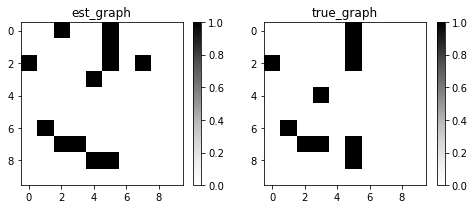

{'fdr': 0.2, 'tpr': 0.8, 'fpr': 0.0571, 'shd': 3, 'nnz': 10, 'precision': 0.6667, 'recall': 0.8, 'F1': 0.7273, 'gscore': 0.4}

Results for direct_lingam



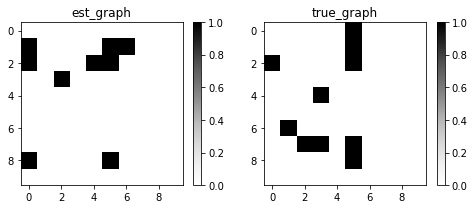

{'fdr': 0.5556, 'tpr': 0.4, 'fpr': 0.1429, 'shd': 10, 'nnz': 9, 'precision': 0.4444, 'recall': 0.4, 'F1': 0.4211, 'gscore': 0.0}

Results for ica_lingam



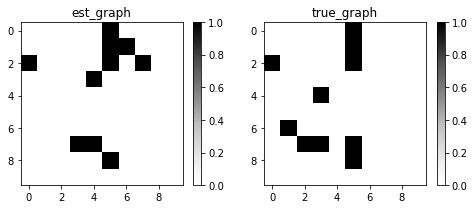

{'fdr': 0.4, 'tpr': 0.6, 'fpr': 0.1143, 'shd': 5, 'nnz': 10, 'precision': 0.6, 'recall': 0.6, 'F1': 0.6, 'gscore': 0.2}

Results for notears



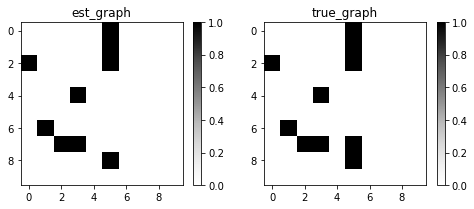

{'fdr': 0.0, 'tpr': 0.9, 'fpr': 0.0, 'shd': 1, 'nnz': 9, 'precision': 1.0, 'recall': 0.9, 'F1': 0.9474, 'gscore': 0.9}

Results for golem



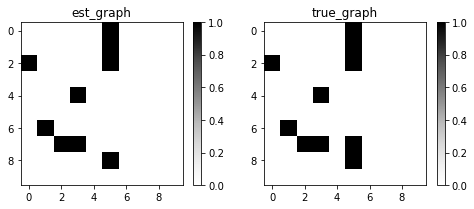

{'fdr': 0.0, 'tpr': 0.9, 'fpr': 0.0, 'shd': 1, 'nnz': 9, 'precision': 1.0, 'recall': 0.9, 'F1': 0.9474, 'gscore': 0.9}

Results for notears_non_lin



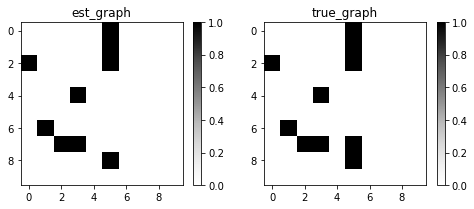

{'fdr': 0.0, 'tpr': 0.9, 'fpr': 0.0, 'shd': 1, 'nnz': 9, 'precision': 1.0, 'recall': 0.9, 'F1': 0.9474, 'gscore': 0.9}

Results for corl



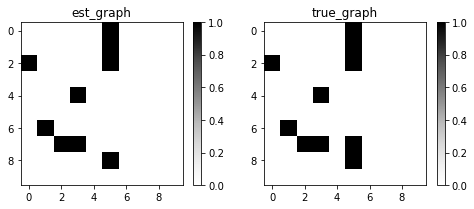

{'fdr': 0.0, 'tpr': 0.9, 'fpr': 0.0, 'shd': 1, 'nnz': 9, 'precision': 1.0, 'recall': 0.9, 'F1': 0.9474, 'gscore': 0.9}


In [7]:
for method in methods:
    print(f'\nResults for {method}\n')
    GraphDAG(methods[method].causal_matrix, true_causal_matrix, 'result')
    mt = MetricsDAG(methods[method].causal_matrix, true_causal_matrix)
    print(mt.metrics)